In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
cwd = os.getcwd()

In [3]:
#auto_df = pd.read_csv('auto-mpg.data.csv')
auto_df = pd.read_csv('auto2.csv')

In [4]:
groupbyAttrs = auto_df.select_dtypes(include=['int64'])
groupbyAttrs_labels = list(groupbyAttrs)
print(groupbyAttrs_labels)

['cylinders', 'model year', 'origin']


In [5]:
continuousAttrs = auto_df.select_dtypes(include=['float64'])
continuousAttrs_labels = list(continuousAttrs)
print(continuousAttrs_labels)

['mpg', 'horsepower', 'acceleration']


In [6]:
import detect_simpsons_paradox as dsp

In [7]:
result_df = dsp.detect_simpsons_paradox(auto_df)
result_df['attr1'] = result_df['attr1'].map(lambda x:continuousAttrs_labels[x])
# Map attribute index to attribute name
result_df['attr2'] = result_df['attr2'].map(lambda x:continuousAttrs_labels[x])
result_df = result_df.sort_values(['attr1', 'attr2'], ascending=[1, 1])

In [8]:
print(result_df)

    allCorr attr1         attr2  reverseCorr groupbyAttr  subgroup
1  0.423329   mpg  acceleration    -0.818873   cylinders         3
3  0.423329   mpg  acceleration    -0.341214   cylinders         6
4  0.423329   mpg  acceleration    -0.050545  model year        75
5  0.423329   mpg  acceleration    -0.051280  model year        79
0 -0.778427   mpg    horsepower     0.620807   cylinders         3
2 -0.778427   mpg    horsepower     0.013135   cylinders         6


In [9]:
print(auto_df.cylinders.unique())
print(auto_df['model year'].unique())

[8 4 6 3 5]
[70 71 72 73 74 75 76 77 78 79 80 81 82]


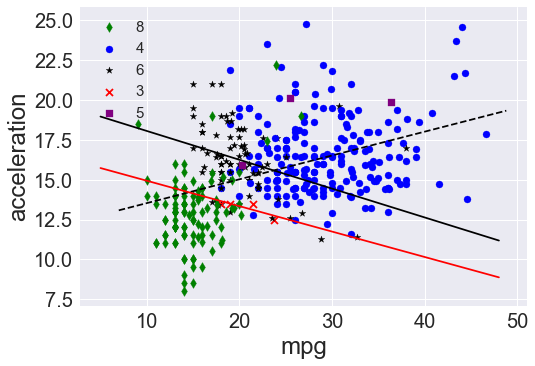

In [10]:
fig = plt.figure()
colors = {'3':'red', '4':'blue', '5':'purple', '6':'black','8':'green'}
markers = {'3':'x', '4':'o', '5':'s','6':'*','8':'d'}

#plt.scatter(auto_df['mpg'], auto_df['acceleration'], c=auto_df['cylinders'].apply(lambda x: colors[str(x)]))
for i in range(len(auto_df['mpg'])):
    plt.scatter(auto_df['mpg'][i], auto_df['acceleration'][i], c=colors[str(auto_df['cylinders'][i])], marker=markers[str(auto_df['cylinders'][i])], label=auto_df['cylinders'][i])

plt.xlabel('mpg',  fontsize=24)
plt.ylabel('acceleration', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='3')
#green_patch = mpatches.Patch(color='blue', label='4')
#purple_patch = mpatches.Patch(color='purple', label='5')
#black_patch = mpatches.Patch(color='black', label='6')
#green_patch = mpatches.Patch(color='green', label='8')
#plt.legend(handles=[red_patch, green_patch, blue_patch,black_patch,orange_patch])

from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15})

# Add correlation line
axes = plt.gca()
x = auto_df['mpg']
y = auto_df['acceleration']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

cylinder3 = auto_df[auto_df['cylinders'] ==3]
cylinder6 = auto_df[auto_df['cylinders'] ==6]
x1 = cylinder3['mpg']
y1 = cylinder3['acceleration']

m1, b1 = np.polyfit(x1, y1, 1)
#print(axes.get_xlim()[0])
#print(axes.get_xlim()[1])
X_plot1 = np.linspace(5,48,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = cylinder6['mpg']
y2 = cylinder6['acceleration']

m, b = np.polyfit(x2, y2, 1)
X_plot = np.linspace(5,48,100)
plt.plot(X_plot, m*X_plot + b, '-', color='black')

plt.show()

#fig.savefig('auto1.jpg')

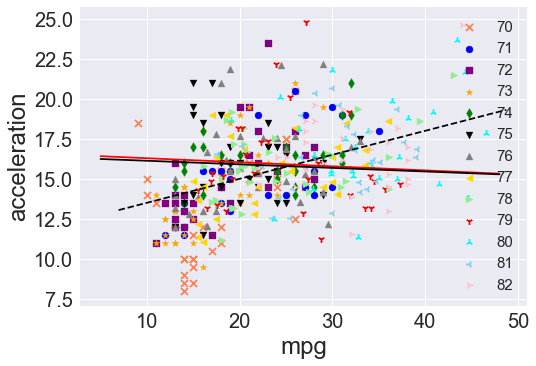

In [11]:
fig = plt.figure()
colors = {'70':'coral', '71':'blue', '72':'purple', '73':'orange','74':'green', '75':'black', '76':'grey','77':'gold', '78':'lightgreen','79':'red', '80':'cyan', '81':'skyblue','82':'pink'}
markers = {'70':'x', '71':'o', '72':'s','73':'*','74':'d', '75':'v', '76':'^','77':'<', '78':'>','79':'1', '80':'2', '81':'3','82':'4'}

#plt.scatter(auto_df['mpg'], auto_df['acceleration'], c=auto_df['cylinders'].apply(lambda x: colors[str(x)]))
for i in range(len(auto_df['mpg'])):
    plt.scatter(auto_df['mpg'][i], auto_df['acceleration'][i], c=colors[str(auto_df['model year'][i])], marker=markers[str(auto_df['model year'][i])], label=auto_df['model year'][i])


#plt.scatter(auto_df['mpg'], auto_df['acceleration'], c=auto_df['model year'].apply(lambda x: colors[str(x)]))

plt.xlabel('mpg',  fontsize=24)
plt.ylabel('acceleration', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#import matplotlib.patches as mpatches
#patch1 = mpatches.Patch(color='coral', label='70')
#patch2 = mpatches.Patch(color='blue', label='71')
#patch3 = mpatches.Patch(color='purple', label='72')
#patch4 = mpatches.Patch(color='orange', label='73')
#patch5 = mpatches.Patch(color='green', label='74')
#patch6 = mpatches.Patch(color='black', label='75')
#patch7 = mpatches.Patch(color='grey', label='76')
#patch8 = mpatches.Patch(color='gold', label='77')
#patch9 = mpatches.Patch(color='lightgreen', label='78')
#patch10 = mpatches.Patch(color='red', label='79')
#patch11 = mpatches.Patch(color='cyan', label='80')
#patch12 = mpatches.Patch(color='skyblue', label='81')
#patch13 = mpatches.Patch(color='pink', label='82')

#plt.legend(handles=[patch1, patch2, patch3,patch4,patch5,patch6, patch7, patch8,patch9,patch10,patch11, patch12, patch13])
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15})


# Add correlation line
axes = plt.gca()
x = auto_df['mpg']
y = auto_df['acceleration']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

cylinder3 = auto_df[auto_df['model year'] ==75]
cylinder6 = auto_df[auto_df['model year'] ==79]
x1 = cylinder3['mpg']
y1 = cylinder3['acceleration']

m1, b1 = np.polyfit(x1, y1, 1)
#print(axes.get_xlim()[0])
#print(axes.get_xlim()[1])
X_plot1 = np.linspace(5,48,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = cylinder6['mpg']
y2 = cylinder6['acceleration']

m, b = np.polyfit(x2, y2, 1)
X_plot = np.linspace(5,48,100)
plt.plot(X_plot, m*X_plot + b, '-', color='black')

plt.show()

#fig.savefig('auto2.jpg')

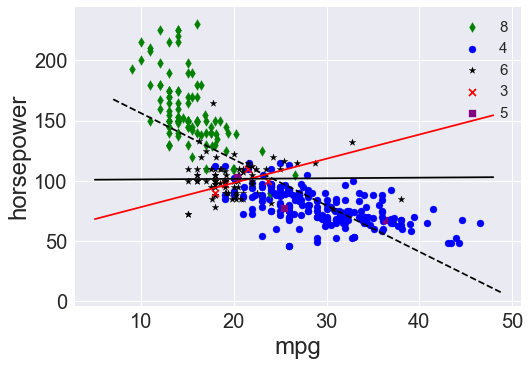

In [12]:
fig = plt.figure()
colors = {'3':'red', '4':'blue', '5':'purple', '6':'black','8':'green'}
markers = {'3':'x', '4':'o', '5':'s','6':'*','8':'d'}

for i in range(len(auto_df['mpg'])):
    plt.scatter(auto_df['mpg'][i], auto_df['horsepower'][i], c=colors[str(auto_df['cylinders'][i])], marker=markers[str(auto_df['cylinders'][i])], label=auto_df['cylinders'][i])

#plt.scatter(auto_df['mpg'], auto_df['horsepower'], c=auto_df['cylinders'].apply(lambda x: colors[str(x)]))

plt.xlabel('mpg',  fontsize=24)
plt.ylabel('horsepower', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='3')
#green_patch = mpatches.Patch(color='blue', label='4')
#purple_patch = mpatches.Patch(color='purple', label='5')
#black_patch = mpatches.Patch(color='black', label='6')
#green_patch = mpatches.Patch(color='green', label='8')
#plt.legend(handles=[red_patch, green_patch, blue_patch,black_patch,orange_patch])
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15}, loc = 1)


# Add correlation line
axes = plt.gca()
x = auto_df['mpg']
y = auto_df['horsepower']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

cylinder3 = auto_df[auto_df['cylinders'] ==3]
cylinder6 = auto_df[auto_df['cylinders'] ==6]
x1 = cylinder3['mpg']
y1 = cylinder3['horsepower']

m1, b1 = np.polyfit(x1, y1, 1)
#print(axes.get_xlim()[0])
#print(axes.get_xlim()[1])
X_plot1 = np.linspace(5,48,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = cylinder6['mpg']
y2 = cylinder6['horsepower']

m, b = np.polyfit(x2, y2, 1)
X_plot = np.linspace(5,48,100)
plt.plot(X_plot, m*X_plot + b, '-', color='black')

plt.show()

#fig.savefig('auto3.jpg')